In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib
import os
import matplotlib.pyplot as plt

In [45]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [39]:
xy = np.loadtxt('../last_P/data/data-02-stock_daily.csv',delimiter=',')
xy = xy[::-1]
x = xy
y = xy[:, [-1]]

In [40]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[5.68002570e+02 5.68002570e+02 5.52922516e+02 1.31000000e+04
  5.58462551e+02]
 [5.61202549e+02 5.66432590e+02 5.58672539e+02 4.12000000e+04
  5.59992565e+02]
 [5.66892592e+02 5.67002574e+02 5.56932537e+02 1.08000000e+04
  5.56972503e+02]
 [5.58712504e+02 5.68452595e+02 5.58712504e+02 7.90000000e+03
  5.67162558e+02]
 [5.99992707e+02 6.04832763e+02 5.62192568e+02 1.47100000e+05
  5.67002574e+02]
 [5.69852553e+02 5.87282679e+02 5.64132581e+02 5.09910000e+06
  5.69742571e+02]
 [5.74652582e+02 5.77772589e+02 5.43002488e+02 6.36930000e+06
  5.43142460e+02]] -> [538.152456]
[[5.61202549e+02 5.66432590e+02 5.58672539e+02 4.12000000e+04
  5.59992565e+02]
 [5.66892592e+02 5.67002574e+02 5.56932537e+02 1.08000000e+04
  5.56972503e+02]
 [5.58712504e+02 5.68452595e+02 5.58712504e+02 7.90000000e+03
  5.67162558e+02]
 [5.99992707e+02 6.04832763e+02 5.62192568e+02 1.47100000e+05
  5.67002574e+02]
 [5.69852553e+02 5.87282679e+02 5.64132581e+02 5.09910000e+06
  5.69742571e+02]
 [5.74652582e+02 5.7777

  6.37609985e+02]] -> [630.380005]
[[6.55460022e+02 6.62989990e+02 6.42900024e+02 2.85530000e+06
  6.46830017e+02]
 [6.39780029e+02 6.40049988e+02 6.12330017e+02 4.26520000e+06
  6.12479980e+02]
 [5.73000000e+02 5.99330017e+02 5.65049988e+02 5.77030000e+06
  5.89609985e+02]
 [6.14909973e+02 6.17450012e+02 5.81109985e+02 3.53800000e+06
  5.82059998e+02]
 [6.10349976e+02 6.31710022e+02 5.99049988e+02 4.23590000e+06
  6.28619995e+02]
 [6.39400024e+02 6.43590027e+02 6.22000000e+02 3.49130000e+06
  6.37609985e+02]
 [6.32820007e+02 6.36880005e+02 6.24559998e+02 1.97870000e+06
  6.30380005e+02]] -> [618.25]
[[6.39780029e+02 6.40049988e+02 6.12330017e+02 4.26520000e+06
  6.12479980e+02]
 [5.73000000e+02 5.99330017e+02 5.65049988e+02 5.77030000e+06
  5.89609985e+02]
 [6.14909973e+02 6.17450012e+02 5.81109985e+02 3.53800000e+06
  5.82059998e+02]
 [6.10349976e+02 6.31710022e+02 5.99049988e+02 4.23590000e+06
  6.28619995e+02]
 [6.39400024e+02 6.43590027e+02 6.22000000e+02 3.49130000e+06
  6.376099

  8.06150024e+02]] -> [806.650024]
[[7.83330017e+02 7.85929993e+02 7.78919983e+02 7.42200000e+05
  7.82789978e+02]
 [7.82750000e+02 7.82780029e+02 7.70409973e+02 1.76020000e+06
  7.71820007e+02]
 [7.78809998e+02 7.89630005e+02 7.75799988e+02 1.64310000e+06
  7.86140015e+02]
 [7.88359985e+02 7.91340027e+02 7.83159973e+02 1.06540000e+06
  7.86900024e+02]
 [7.86080017e+02 7.94479980e+02 7.85020020e+02 1.31540000e+06
  7.94020020e+02]
 [7.95260010e+02 8.07900024e+02 7.92203979e+02 1.62050000e+06
  8.06150024e+02]
 [8.06400024e+02 8.09966003e+02 8.02830017e+02 1.27240000e+06
  8.06650024e+02]] -> [804.789978]
[[7.82750000e+02 7.82780029e+02 7.70409973e+02 1.76020000e+06
  7.71820007e+02]
 [7.78809998e+02 7.89630005e+02 7.75799988e+02 1.64310000e+06
  7.86140015e+02]
 [7.88359985e+02 7.91340027e+02 7.83159973e+02 1.06540000e+06
  7.86900024e+02]
 [7.86080017e+02 7.94479980e+02 7.85020020e+02 1.31540000e+06
  7.94020020e+02]
 [7.95260010e+02 8.07900024e+02 7.92203979e+02 1.62050000e+06
  8.06

In [41]:
train_size = int(len(dataY)* 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]),\
                np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]),\
                np.array(dataY[train_size:len(dataY)])


In [43]:
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [48]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)    

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


[step: 0] loss: 185197232.0
[step: 1] loss: 185180416.0
[step: 2] loss: 185163680.0
[step: 3] loss: 185146880.0
[step: 4] loss: 185130112.0
[step: 5] loss: 185113312.0
[step: 6] loss: 185096544.0
[step: 7] loss: 185079776.0
[step: 8] loss: 185063008.0
[step: 9] loss: 185046224.0
[step: 10] loss: 185029456.0
[step: 11] loss: 185012720.0
[step: 12] loss: 184995904.0
[step: 13] loss: 184979152.0
[step: 14] loss: 184962368.0
[step: 15] loss: 184945680.0
[step: 16] loss: 184928816.0
[step: 17] loss: 184912080.0
[step: 18] loss: 184895328.0
[step: 19] loss: 184878560.0
[step: 20] loss: 184861824.0
[step: 21] loss: 184845008.0
[step: 22] loss: 184828272.0
[step: 23] loss: 184811552.0
[step: 24] loss: 184794752.0
[step: 25] loss: 184778000.0
[step: 26] loss: 184761264.0
[step: 27] loss: 184744480.0
[step: 28] loss: 184727744.0
[step: 29] loss: 184711008.0
[step: 30] loss: 184694240.0
[step: 31] loss: 184677488.0
[step: 32] loss: 184660736.0
[step: 33] loss: 184643968.0
[step: 34] loss: 1846272

[step: 287] loss: 180426704.0
[step: 288] loss: 180410288.0
[step: 289] loss: 180393840.0
[step: 290] loss: 180377392.0
[step: 291] loss: 180360928.0
[step: 292] loss: 180344464.0
[step: 293] loss: 180328000.0
[step: 294] loss: 180311584.0
[step: 295] loss: 180295088.0
[step: 296] loss: 180278656.0
[step: 297] loss: 180262240.0
[step: 298] loss: 180245744.0
[step: 299] loss: 180229312.0
[step: 300] loss: 180212880.0
[step: 301] loss: 180196416.0
[step: 302] loss: 180179952.0
[step: 303] loss: 180163536.0
[step: 304] loss: 180147072.0
[step: 305] loss: 180130608.0
[step: 306] loss: 180114192.0
[step: 307] loss: 180097776.0
[step: 308] loss: 180081344.0
[step: 309] loss: 180064896.0
[step: 310] loss: 180048448.0
[step: 311] loss: 180032016.0
[step: 312] loss: 180015584.0
[step: 313] loss: 179999168.0
[step: 314] loss: 179982720.0
[step: 315] loss: 179966320.0
[step: 316] loss: 179949856.0
[step: 317] loss: 179933440.0
[step: 318] loss: 179917008.0
[step: 319] loss: 179900592.0
[step: 320

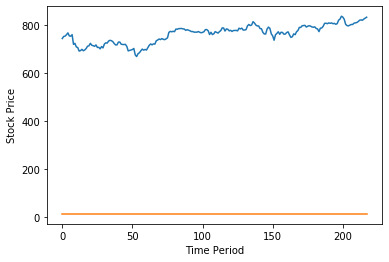

In [49]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()
